In [1]:
from astromodule import *
from astropy.coordinates import Distance

In [2]:
df = pd.read_csv("./database/hyades_2deg_photometric.csv",
	usecols=['ra','dec','pmra','pmdec',
	'parallax','phot_g_mean_mag','bp_rp','dr2_radial_velocity'])


In [3]:
#creating a dataframe to plot the propermotion of the stars in field of view
df0 = df.drop(columns=
	['ra','dec','parallax','bp_rp','phot_g_mean_mag','dr2_radial_velocity'])

df0 = df0.dropna()


In [4]:
#creating a dataframe to plot the propermotion of the stars in field of view
df1 = df.drop(columns=['phot_g_mean_mag','bp_rp',
			'dr2_radial_velocity'])
df1 = df1.dropna()

#removing from the cluster field of view stars 

#first to find the distance of all the stars
df1_parallax0 = df1.parallax.to_list()
df1_parallax1 = list(map(abs,df1_parallax0))
d = Distance(parallax = df1_parallax1*u.mas)
d = d.to_value()

#adding the distance column to the dataframe
df1['distance']=d

#now removing all the rows with a distance >100 pc
df1 = df1.drop(df1[df1.distance >100].index)
df2 = df1.drop(columns = ['parallax','distance','ra','dec'])


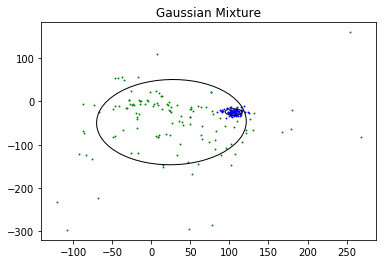

[0, 1] ['b', 'g']
which label index is the cluster: 0


In [5]:
#running gmm and plot the results 
index = gmm_(df2,2)


In [6]:
#creating a dataframe to plot the vector plot diagrams 
df1 = df.drop(columns=
	['parallax','bp_rp','phot_g_mean_mag','dr2_radial_velocity'])
df1 = df1.dropna()


In [7]:
#filtering out the stars that belong to the cluster using indices
df2 = filter_cluster(df1,index)


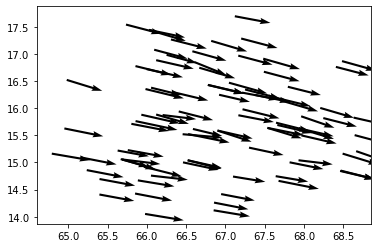

In [8]:
#vector point diagram of the stars selected 
ax = plt.subplot()
ax.quiver(df2.ra, df2.dec,df2.pmra,df2.pmdec,scale=1000)
plt.show()



In [9]:
#creating a dataframe for creating a color magnitude diagram
df3 =df.drop(columns=
	['dr2_radial_velocity']) 
df3 = df3.dropna()
df3_index = df3.index.tolist()


In [10]:
#removing indices with no corresponding radial velocites
mod_index = list(set(df3_index).intersection(index))

#filtering out the stars that belong to the cluster using indices 
df4 = filter_cluster(df3,mod_index)

#now we output the data to a csv file
print('data has been outputed to cmd_data_m67.csv')
df4.to_csv('./output/cmd_data_m67.csv') 


data has been outputed to cmd_data_m67.csv


In [11]:
def plot_cmd(df):
	y = df.phot_g_mean_mag.tolist()
	x = df.bp_rp.tolist()
	plt.plot(x,y, 'ro',markersize = 1,alpha =1)
	plt.ylabel ('$Absolute Magnitude(g)$')
	plt.xlabel ('$Color (bp-rp)$')
	plt.gca().invert_yaxis()
	#plt.title('Colour Magnitude Diagram')


Text(0.5, 1.0, 'Colour Magnitude Diagram')

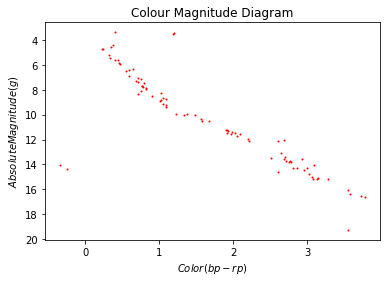

In [12]:
plot_cmd(df4)
plt.title('Colour Magnitude Diagram')

In [13]:
def isochrone_plot(y,afe,feh,ebv,age,distance):
	#using plot_cmd function to plot the color magnitude diagram 
	df0,df0_h = isochrone_(y,afe,feh,age)
	color = df0.Gaia_BP - df0.Gaia_RP
	plot_cmd(df4)

	#write a function to perform isochrone fitting on the above cmd
	distance_modulus = 5*np.log10(distance/10)
	print ('dm = {}'.format(distance_modulus))
	print ('age = {}'.format(age))
	print(df0_h)
	model_bp = df0.Gaia_BP.tolist()
	model_g  = df0.Gaia_G.tolist()
	model_bp = model_bp + distance_modulus
	model_g = model_g + distance_modulus


	#taking into consideration extinction and reddening 
	#ebv is reddening 
    #ebv = 0.04
	#av is extinction 
	av =3.2*ebv

	model_g = model_g +av
	model_bp = model_bp + av
	color = color +ebv
	plt.plot( color,model_g)


age is available
dm = 3.5378508804896818
age = 1.0
     M_L       Y         Z      Zeff  FeH  aFe
0  1.938  0.2696  0.016115  0.016115  0.0  0.0


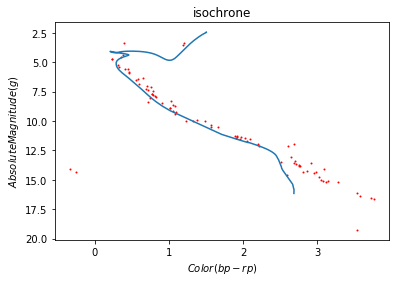

In [14]:
y = 1
afe = 2
feh = 0
ebv = 0
age = 1
distance = 51
isochrone_plot(y,afe,int(feh),float(ebv),float(age),float(distance))
plt.title("isochrone fitting")
plt.show()
